#Task 2

You have a cart pole. Body $1$ is a slider, mass $m_1$, it moves without friction.

$AB$ is a massless rod with length $l$. Body $2$ with mass $m_2$ is connected to $AB$ in point $B$.

It's a 2 DoF system. You should take $x$ and $\phi$ as a representation of this system. The origin of each coordinate should be the same as on the picture.

**Initial conditions:**
1. $x = 0,\ \phi = 10^\circ,\ \dot{x} = 0,\ \dot{\phi} = 0,\ t=0$;
2. $x = 0.5,\ \phi = 45^\circ,\ \dot{x} = 0,\ \dot{\phi} = 0,\ t=0$;
3. $x = 0.5,\ \phi = -135^\circ,\ \dot{x} = 0,\ \dot{\phi} = 0,\ t=0$;

**Parameters:** $m_1 = 5\ \text{kg},\ m_2 = 1\ \text{kg},\ l = 1\ \text{m}$.

![HW7.1](https://drive.google.com/uc?export=view&id=18K5Bz6euVaN6IceDKWkNOluUen--Lx48)


#Solution

**Research object:**

**Research object:** A system of 2 bodies: cart and pole

**Motion:** A cart - plane motion, pole - rotational motion


**Force analysis:** $G_1 = m_1 g$, $G_2 = m_2 g, T, N, m_2 \ddot x \text{ - inertial force}$


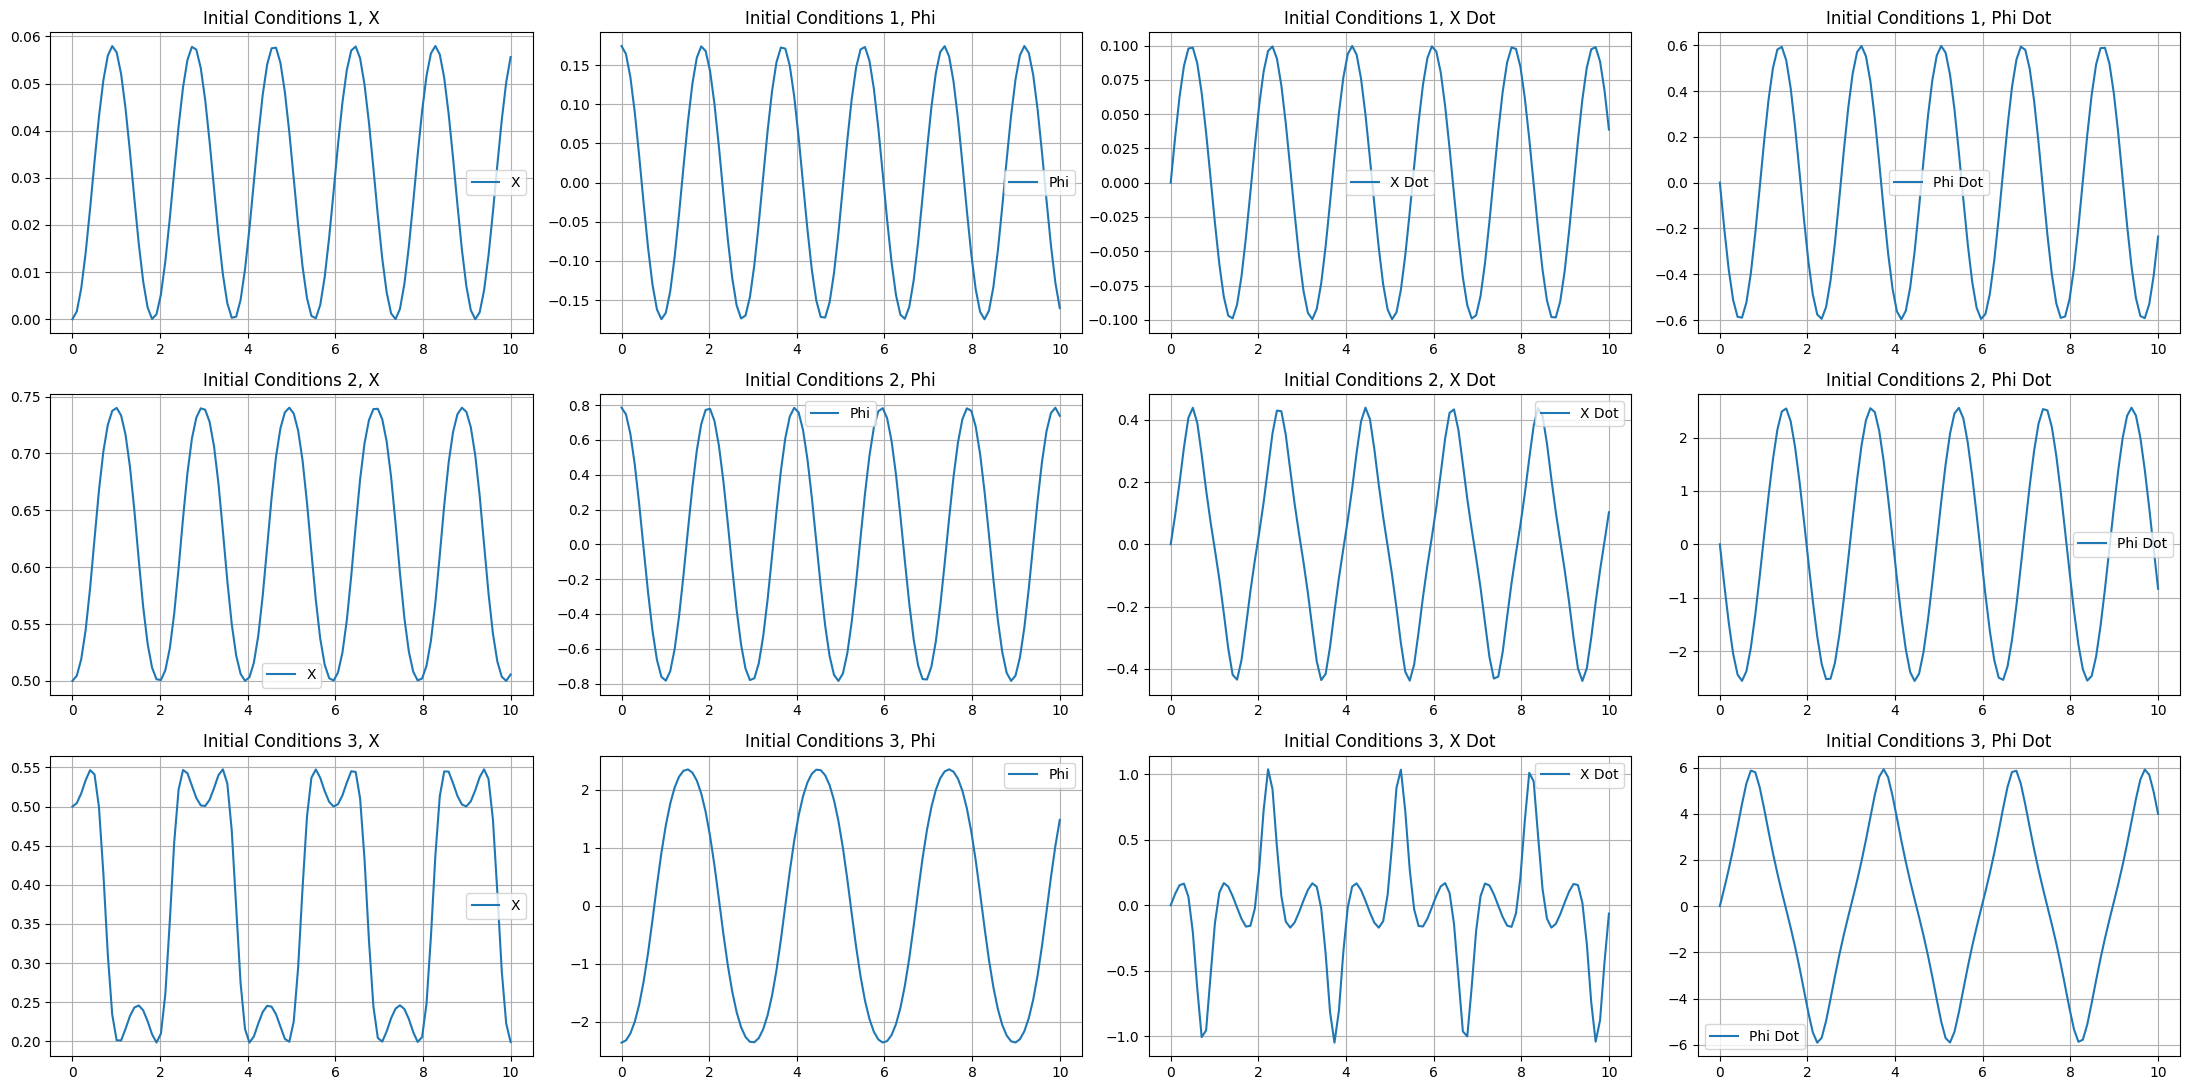

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

T_x, T_y, N, m1, m2, g, a2, phi, x, l, J, t= sp.symbols('T_x T_y N m1 m2 g a2 phi x l J t')

# Define x(t) and its derivatives
x = sp.Function('x')(t)
dx_dt = sp.diff(x, t)
ddx_ddt_sym = sp.diff(x, t, t)

# Define phi(t) and its derivatives
phi = sp.Function('phi')(t)
dphi_dt = sp.diff(phi, t)
ddphi_ddt_sym = sp.diff(phi, t, t)

# Define equations
eq1 = -T_x - m1 * ddx_ddt_symk
eq2 = N - m1 * g - T_y
eq3 = T_x - m2 * (ddphi_ddt_sym * l * sp.cos(phi) - dphi_dt**2 * l * sp.sin(phi)) - m2 * ddx_ddt_sym
eq4 = T_y - m2 * g - m2 * (ddphi_ddt_sym * l * sp.sin(phi) + dphi_dt**2 * l * sp.cos(phi))
eq5 = J * ddphi_ddt_sym + m2 * g * sp.sin(phi) * l + m2 * ddx_ddt_sym * l * sp.cos(phi)

# Solve the equations
solutions = sp.solve((eq1, eq3, eq5), (T_x, ddx_ddt_sym, ddphi_ddt_sym))

substitutions = {m1: 5, m2: 1, l: 1, g: 9.8}

# Substite J = m2 * l**2
numeric_solutions = {key: value.subs(J, m2 * l**2).subs(substitutions) for key, value in solutions.items()}


def state_space_model(state, t_val):
    phi_val, x_val, dphi_dt_val, dx_dt_val = state
    ddphi_ddt_val = numeric_solutions[ddphi_ddt_sym].subs(phi, phi_val).evalf().doit()
    ddx_ddt_val = numeric_solutions[ddx_ddt_sym].subs(dphi_dt, dphi_dt_val).subs(phi, phi_val).evalf().doit()
    return [dphi_dt_val, dx_dt_val, ddphi_ddt_val, ddx_ddt_val]


# Initial conditions
initial_states = [
    [10.0/180*np.pi, 0.0, 0.0, 0.0],
    [45.0/180*np.pi, 0.5, 0.0, 0.0],
    [-135.0/180*np.pi, 0.5, 0.0, 0.0]
]

ts = np.linspace(0, 10, 100)

# Plotting
fig, axs = plt.subplots(len(initial_states), 4, figsize=(22, 11))

for i, initial_state in enumerate(initial_states):
    solution = odeint(state_space_model, initial_state, ts)
    phi_result, x_result, phi_dot_result, x_dot_result = solution[:, 0], solution[:, 1], solution[:, 2], solution[:, 3]
    axs[i, 0].plot(ts, x_result, label='X')
    axs[i, 0].set_title(f'Initial Conditions {i+1}, X')
    axs[i, 0].legend()
    axs[i, 0].grid(True)
    axs[i, 1].plot(ts, phi_result, label='Phi')
    axs[i, 1].set_title(f'Initial Conditions {i+1}, Phi')
    axs[i, 1].legend()
    axs[i, 1].grid(True)
    axs[i, 2].plot(ts, x_dot_result, label='X Dot')
    axs[i, 2].set_title(f'Initial Conditions {i+1}, X Dot')
    axs[i, 2].legend()
    axs[i, 2].grid(True)
    axs[i, 3].plot(ts, phi_dot_result, label='Phi Dot')
    axs[i, 3].set_title(f'Initial Conditions {i+1}, Phi Dot')
    axs[i, 3].legend()
    axs[i, 3].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
numeric_solutions[ddphi_ddt_sym]

sin(phi(t))*cos(phi(t))*Derivative(phi(t), t)**2/(cos(phi(t))**2 - 6) + 58.8*sin(phi(t))/(cos(phi(t))**2 - 6)

#Simulation

###Define the states of all the objects for simulation

NB: choose one of the options for  ***initial_state***

In [ ]:
import sympy as sp
import numpy as np
from sympy import Point, cos, sin, sqrt, pi, Matrix, Line

g = 9.81
l = 7
y_A = 7

ts = np.linspace(0, 10, 100)

# Initial states
initial_state = [-135.0/180*np.pi, 0.5, 0.0, 0.0]

# [10.0/180*np.pi, 0, 0.0, 0.0]
# [45.0/180*np.pi, 0.5, 0.0, 0.0]
states = odeint(state_space_model, initial_state, ts)


def rotation_matrix(angle):
    return Matrix([[cos(angle), -sin(angle)], [sin(angle), cos(angle)]])

x_vals = states[:, 1]
phi_vals = states[:, 0]

A_eq = [Point(x, y_A) for x in x_vals]

R_eq = [Point(x-2, y_A-1) for x in x_vals]
E_eq = [Point(x-2, y_A+1) for x in x_vals]
C_eq = [Point(x+2, y_A+1) for x in x_vals]
T_eq = [Point(x+2, y_A-1) for x in x_vals]

P_eq = [Point(x, y_A-l) for x in x_vals]
AP_vec = [P-A for P, A in zip(P_eq, A_eq)]

AP_rotated_vector = [rotation_matrix(angle) * Matrix([AP[0], AP[1]]) for angle, AP in zip(phi_vals, AP_vec)]

RT_line = Line(Point(-30, y_A-1), Point(30, y_A-1))

Q_eq = [Point(A[0] + AP[0], A[1] + AP[1]) for A, AP in zip(A_eq, AP_rotated_vector)]

###Make the animation

In [ ]:
from sympy import *
from sympy import Symbol, Ellipse, Point, Line, Circle, Matrix, diff
from sympy.vector import CoordSys3D
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.lines as mlines
import numpy as np


points_vals = zip(A_eq, R_eq, E_eq, C_eq, T_eq, Q_eq)


points_names = ["A", "R", "E", "C", "T", "Q"]

states = points_vals

fig, ax = plt.subplots()
ax.set_aspect("equal")


xdata, ydata = [], []
ln, = plt.plot([], [], 'b-')

vectors = []
points  = []

titles  = []
lines   = []

# Animation initialisation
def init_model():
    ax.set_xlim(-15, 15)
    ax.set_ylim(-7, 15)
    plt.title('Simulation')
    return ln,


# Remove all the previous points, labels, vectors
def clear_screen():
    if len(ax.patches):
        ax.patches[-1].remove()

    while len(points):
        for item in points[-1]:
            item.remove()
        points.pop()

    while len(lines):
        for item in lines[-1]:
            item.remove()
        lines.pop()

    while len(titles):
        titles[-1].remove()
        titles.pop()

    while len(vectors):
        vectors[-1].remove()
        vectors.pop()

# Animation update on each frame
def update_model(state):

    clear_screen()

    (A, R, E, C, T, Q) = state

    # Draw titles
    titles.extend([
        ax.text(i[0][0], i[0][1] + 1, i[1], fontsize=10)
        for i in zip((A, Q), ("A", "Q"))
    ])

    # Draw the lines
    lines.append(plt.plot([RT_line.p1[0], RT_line.p2[0]], [RT_line.p1[1], RT_line.p2[1]], linestyle="solid", linewidth=1, color="black"))

    lines.extend([
        plt.plot([R[0], E[0]], [R[1], E[1]], linestyle="solid", linewidth=2, color="#CD7F32"),
        plt.plot([E[0], C[0]], [E[1], C[1]], linestyle="solid", linewidth=2, color="#CD7F32"),
        plt.plot([C[0], T[0]], [C[1], T[1]], linestyle="solid", linewidth=2, color="#CD7F32"),
        plt.plot([T[0], R[0]], [T[1], R[1]], linestyle="solid", linewidth=2, color="#CD7F32"),
        plt.plot([A[0], Q[0]], [A[1], Q[1]], linestyle="solid", linewidth=2, color="#696969"),

    ])

    ax.fill([R[0], E[0], C[0], T[0], R[0]], [R[1], E[1], C[1], T[1], R[1]], color='orange', alpha=0.5)

    # Draw all moving points
    points.extend([
        plt.plot(i[0], i[1], marker="o", markersize=3, markeredgecolor="black", markerfacecolor="black")
        for i in (A, R, E, C, T, Q)
    ])

    return ln,

def add_legend():
  legend_entries = [
    mlines.Line2D([], [], color='black', marker='_', linestyle='None', markersize=10, label='mg'),
    mlines.Line2D([], [], color='blue', marker='_', linestyle='None', markersize=10, label='N'),
    mlines.Line2D([], [], color='green', marker='_', linestyle='None', markersize=10, label='F_centripetal'),
    mlines.Line2D([], [], color='orange', marker='_', linestyle='None', markersize=10, label='F_coriolis'),
    mlines.Line2D([], [], color='red', marker='_', linestyle='None', markersize=10, label='Acceleration (normal)'),
    mlines.Line2D([], [], color='magenta', marker='_', linestyle='None', markersize=10, label='Acceleration (coriolis)'),
  ]

  ax.legend(handles=legend_entries, loc='upper right')

anim = FuncAnimation(fig, update_model, frames=states,
                        init_func=init_model, blit=True)


from IPython.display import HTML, display
display(HTML(anim.to_jshtml()))
plt.close(fig)

<ipython-input-15-dfe736918ccb>:108: UserWarning: frames=<zip object at 0x7a38e53dd540> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = FuncAnimation(fig, update_model, frames=states,
